In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('la-crime-data')
jovian.set_colab_id('1xO8xlhWcFi1k0ZqSGpPTsNeJTqqP2WuS')

# **Exploratory Data Analysis on LA Crime Dataset**

The dataset is taken from Kaggle which is one of great places to extract data for exploratery data analysis. The data consists of all the crime data in the state of LA from the year 2010.


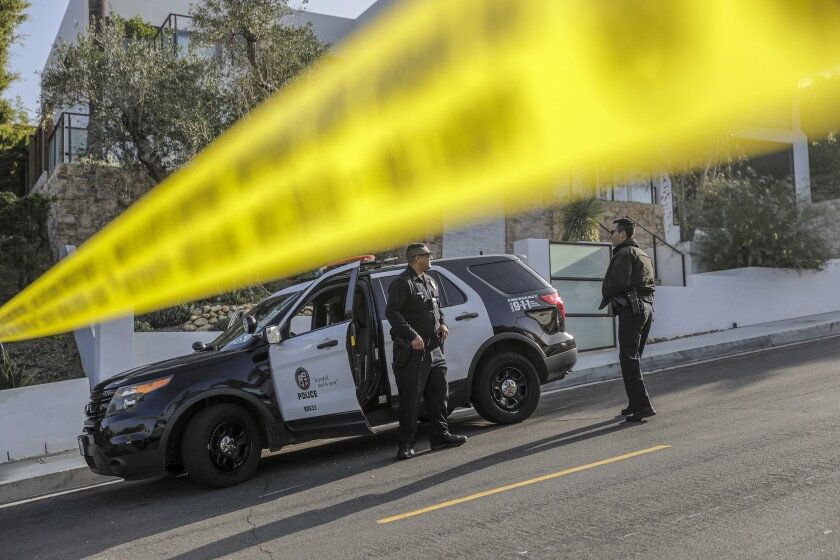

## **About data set**

The data set consists of 18,75223 rows and 20 columns of data


## **Objective** 

The objective is to analyse data with reference to different approches by means to find the insights that would be usefull in future cases where in it will help in identifing the most crimes that the victim is associated with and the different parrameter's which are beeing involved in the due process.


## **Project goals**

The Goal of the project is to analyse and drow different graphs with different parameters so to search for all the insigths that we can look for. 

# **Here's an outline of the steps we'll follow:**

* Importing all the required Libraries.
* Download the data using opendatasets Librarie.
* Merging the data sets available in the data base
* Data Cleaning and analysis
* Exploratory data analysis
* Insights Overview
* Summary
* Reference


## **Importing all the required library.**

So let's start by installing jovian and Required librairis during the whole analysis

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project='la-crime-data')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/bittujha1997/la-crime-data


'https://jovian.ai/bittujha1997/la-crime-data'

In [ ]:
pip install opendatasets --quiet

In [ ]:
# Required libraies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import opendatasets as od
import folium


In [ ]:
# Kaggle url of dataset.
la_accidents = 'https://www.kaggle.com/datasets/chaitanyakck/crime-data-from-2020-to-present'

## **Download the data using opendatasets Librarie.**

---





In [ ]:
Df = od.download(la_accidents)

Skipping, found downloaded files in "./crime-data-from-2020-to-present" (use force=True to force download)


## **Merging the data sets available in the data base**


In [ ]:
adit = ['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc',
       'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'LOCATION', 'LAT',
       'LON']

In [ ]:
aditt = ['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc',
       'Vict Age', 'Vict Sex', 'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'LOCATION', 'LAT',
       'LON']

In [ ]:
la_crimes_present = pd.read_csv('/content/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv',usecols = aditt, parse_dates=['Date Rptd','DATE OCC'])

In [ ]:
la_crimes_old = pd.read_csv('/content/crime-data-from-2020-to-present/Crime_Data_from_2010_to_2019.csv', usecols = adit,parse_dates=['Date Rptd','DATE OCC'])

In [ ]:
la_crimes_old.rename(columns = {'AREA ':'AREA'}, inplace = True)

In [ ]:
la_crimes = la_crimes_old.append(la_crimes_present)

# **Data Cleaning and Analysis.**

> Indented block




In [ ]:
la_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444416 entries, 0 to 326212
Data columns (total 17 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date Rptd    datetime64[ns]
 1   DATE OCC     datetime64[ns]
 2   TIME OCC     int64         
 3   AREA         int64         
 4   AREA NAME    object        
 5   Rpt Dist No  int64         
 6   Crm Cd       int64         
 7   Crm Cd Desc  object        
 8   Vict Age     int64         
 9   Vict Sex     object        
 10  Premis Cd    float64       
 11  Premis Desc  object        
 12  Status       object        
 13  Status Desc  object        
 14  LOCATION     object        
 15  LAT          float64       
 16  LON          float64       
dtypes: datetime64[ns](2), float64(3), int64(5), object(7)
memory usage: 335.7+ MB


## **Looking for missing Values in the data set**

In [ ]:
missing_values = la_crimes.isna().sum().sort_values(ascending = False)
px.bar(missing_values[missing_values != 0])

## **Droping or Replacing the Nan values**

In [ ]:
la_crimes['Premis Cd'] = la_crimes['Premis Cd'].fillna(0)

In [ ]:
la_crimes['Premis Desc'] = la_crimes['Premis Desc'].fillna('unknown')

In [ ]:
la_crimes.describe()

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd,LAT,LON
count,2.444416e+06,2.444416e+06,2.444416e+06,2.444416e+06,2.444416e+06,2.444416e+06,2.444416e+06,2.444416e+06
mean,1.358548e+03,1.104842e+01,1.151201e+03,5.075575e+02,3.153336e+01,3.092152e+02,3.403125e+01,-1.181979e+02
std,6.475771e+02,6.016779e+00,6.017067e+02,2.106469e+02,2.080149e+01,2.117302e+02,1.259394e+00,4.356994e+00
min,1.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,-1.100000e+01,0.000000e+00,0.000000e+00,-1.188279e+02
25%,9.300000e+02,6.000000e+00,6.420000e+02,3.300000e+02,1.900000e+01,1.020000e+02,3.401020e+01,-1.184356e+02
50%,1.430000e+03,1.100000e+01,1.181000e+03,4.420000e+02,3.100000e+01,2.100000e+02,3.406180e+01,-1.183285e+02
75%,1.900000e+03,1.600000e+01,1.663000e+03,6.260000e+02,4.600000e+01,5.010000e+02,3.417330e+01,-1.182772e+02
max,2.359000e+03,2.100000e+01,2.199000e+03,9.560000e+02,1.200000e+02,9.710000e+02,3.479070e+01,0.000000e+00


In [ ]:
la_crimes.drop(la_crimes.index[la_crimes['Vict Age'] == 0], inplace= True)

In [ ]:
la_crimes.drop(la_crimes.loc[la_crimes['Vict Sex'] == 'X'].index, inplace=True)

In [ ]:
la_crimes.drop(la_crimes.loc[la_crimes['Vict Sex'] == 'H'].index, inplace=True)

In [ ]:
la_crimes.drop(la_crimes.loc[la_crimes['Vict Sex'] == '-'].index, inplace=True)

In [ ]:
la_crimes.drop(la_crimes.loc[la_crimes['Vict Sex'] == 'unknown'].index, inplace=True)

In [ ]:
la_crimes.drop(la_crimes.loc[la_crimes['Vict Sex'] == 'N'].index, inplace=True)

In [ ]:
la_crimes.drop(la_crimes[ (la_crimes['Vict Age'] > 98) | (la_crimes['Vict Age'] < 1)].index, inplace= True)

In [ ]:
la_crimes.set_index(['Date Rptd'], inplace = True)

In [ ]:
la_crimes.reset_index(level =['Date Rptd'], inplace = True)

In [ ]:
la_crimes['Vict Sex'] = la_crimes['Vict Sex'].fillna('unknown')

## **Creating new features**

In [ ]:
la_crimes['week_day']= la_crimes['DATE OCC'].dt.day_name()

la_crimes['month'] = la_crimes['DATE OCC'].dt.month_name()

la_crimes['year'] = la_crimes['DATE OCC'].dt.year

In [ ]:
df = la_crimes.copy()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
victim_age = df['Vict Age'].value_counts()
victim_age.sort_values(ascending= False)

25    51547
26    51213
27    50908
28    50535
29    50151
      ...  
94      352
95      272
96      207
97      179
98      137
Name: Vict Age, Length: 97, dtype: int64

# **Exploratory data analysis**

## **Analyzing victim age and their range in the data**

In [ ]:
#Fig 1
fig1 = px.bar(victim_age, y=victim_age.values , x=victim_age.index, template= 'plotly_white')

fig1.update_layout(title='Cases as per the Age', title_x = 0.5,
                   xaxis_title='Age',
                   yaxis_title='Number of cases')

**Observations**

* Drawing relationship between ages analyzing which age fares as per the range

* We plot a bar between age and count of the plot using plotly

* The Highest number of victicms with reference to age are in the range of 20-50 as per the graph you can see in fig




## **Analyzing the range of crime in states**

In [ ]:
number_cases_percentage = (df['AREA NAME'].value_counts() / (df['AREA NAME'].value_counts().sum()))

most_number_crime_states = number_cases_percentage[0] + number_cases_percentage[1]

most_number_crime_states



0.136212599781466

In [ ]:
#Fig 2
fig2 =  px.histogram(x = df['AREA NAME'].value_counts().index.unique(), y= number_cases_percentage)

fig2.update_layout(title='Cases as per the Location', title_x = 0.5,
                   xaxis_title='Location',
                   yaxis_title= 'Crime Number\'s', template = 'plotly_dark')

fig2.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

Observations

* We draw a relationship between location and no of victim as per the location

* We huse histogram plot to plot the relationship between the crime desc and the location column using plotly

* 77th street as the Highest number cases lodged

## **Analyzing the range of offence type over period of years**

In [ ]:
# Funtion to split column
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
crime_discription = split_multicolumn(df['Crm Cd Desc'])
crime_discription

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



,VIOLATION OF COURT ORDER,SHOPLIFTING - PETTY THEFT ($950 & UNDER),BURGLARY FROM VEHICLE,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT","THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",BATTERY - SIMPLE ASSAULT,ROBBERY,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",CHILD NEGLECT (SEE 300 W.I.C.),INTIMATE PARTNER - AGGRAVATED ASSAULT,...,INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),DISHONEST EMPLOYEE ATTEMPTED THEFT,"MANSLAUGHTER, NEGLIGENT",TRAIN WRECKING,BLOCKING DOOR INDUCTION CENTER,BOAT - STOLEN,FIREARMS RESTRAINING ORDER (FIREARMS RO),"VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS",FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO),FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1875219,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1875220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1875221,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
crime_values = crime_discription.sum().sort_values()

In [ ]:
fig3 = px.bar(crime_values,x = crime_values.values, y= crime_values.index,  width=1000, height= 1100)

fig3.update_layout(title='Crime responses', title_x = 0.5,
                   xaxis_title='range of crime',
                   yaxis_title='Type of cases', template = 'plotly_dark', yaxis_tickfont_size=8)

**Observations**

* Let us understand which crime is reported for the highest number of times over the years

* Let us use funtion created multi columns and divide the perticular column and now let us plot the index on x and values on the y using bar chart with in plotly

* Burglary from vehicle is the most repeated crime over thekn years

## **Analyzing status discription of the victims of crime**

In [ ]:
fig4 = px.pie(df, values= df['Status Desc'].value_counts().values, names=df['Status Desc'].value_counts().index)

fig4.update_layout(showlegend = True, title = 'Crime arrest status', title_x = 0.5)


**Observations**

* Let us analyse what is the status of the vict and crime status assosiated

* Using pie chart in plotly to determine the arrest status of all the crime over the years

* Invest cont is the most prominent stauts given to a victim over the years 

# **Let's Ask & Answer question's**

## **1. On a daily basis which day do we have most cases?**

In [ ]:
#Answering question no 1

op = df.week_day.value_counts().to_frame()

op.reset_index(inplace= True)

op.rename(columns = {'index':'king'}, inplace = True)

op.sort_values(by= 'week_day', inplace= True )

op

,king,week_day
6,Sunday,261253
5,Tuesday,262175
4,Thursday,263095
3,Wednesday,264721
2,Monday,269518
1,Saturday,269715
0,Friday,284746


In [ ]:
fig5 = px.histogram(op, x=op.week_day, y= op.king)

fig5.update_layout(title='Crime range', title_x = 0.5,
                   xaxis_title='range of crime',
                   yaxis_title='Type of cases', template = 'plotly_white')

**Observations**

* Here we see the relation ship between week day and value counts refereing to their index

* We use plotly to plot and use histogram as the graph format 

* We see Friday as the highest number of crime reported

## **2. What are the totall number of Rape cases and which location as highest?**

In [ ]:
#Answering question no 2

rape_cases = df[df['Crm Cd Desc'] == 'RAPE, ATTEMPTED']

In [ ]:
rape_cases_force = df[df['Crm Cd Desc'] == 'RAPE, FORCIBLE']

In [ ]:
rap_cases_location_force = split_multicolumn(rape_cases_force['AREA NAME'])

dfff = rap_cases_location_force.sum().to_frame().reset_index()
dfff.rename(columns = {0:'cases'}, inplace = True)
dfff.rename(columns = {'index':'locaa'}, inplace = True)
dfff.sort_values(by= 'cases', ascending= False, inplace= True)
fig_6 = px.histogram(dfff, x= dfff.locaa, y=dfff.cases)

fig_6.update_layout(title='Rape Forcibal demography', title_x = 0.5,
                   xaxis_title='Location',
                   yaxis_title='Number of cases', template = 'plotly_white')

In [ ]:
rap_cases_location = split_multicolumn(rape_cases['AREA NAME'])

dff = rap_cases_location.sum().to_frame().reset_index()
dff.rename(columns = {0:'cases'}, inplace = True)
dff.rename(columns = {'index':'loca'}, inplace = True)
dff.sort_values(by= 'cases', ascending= False, inplace= True)
fig_7 = px.histogram(dff, x= dff.loca, y=dff.cases)

fig_7.update_layout(title='Rape Attempted demography', title_x = 0.5,
                   xaxis_title='Location',
                   yaxis_title='Number of cases', template = 'plotly_dark')

In [ ]:
total_Rape_cases = df[df['Crm Cd Desc'].str.startswith('RAPE')]

total_Rape_cases['Crm Cd Desc'].value_counts().sum()

12296

**Observations**

* We see how many of the crime is comitted and attempted and location where is high and where the location is low

* We filter data as per the requirment and then we sort_values accordingly and plot two histograms using plotly with one for commited and one for attempted

* Totall number of victims are 12,329 and 77th street as the highest number of cases compared witht the rest


## **3. What is the percentage change in victims from 2020 to 2021?**

In [ ]:
#Answering Queastion no 3

dfg = df['year'].value_counts()
dfg = dfg.to_frame()
dfg.reset_index()
dfg.rename(columns = {'index' : 'Year'}, inplace = True)
dfg.rename(columns = {'year' : 'count'}, inplace = True)
dfg.sort_values(by= 'count')

,count
2021,81252
2020,121736
2010,129550
2011,143510
2013,161293
2014,163510
2012,168547
2019,174181
2015,178685
2016,182788


In [ ]:
dfg['count'].index

Int64Index([2017, 2018, 2016, 2015, 2019, 2012, 2014, 2013, 2011, 2010, 2020,
            2021],
           dtype='int64')

In [ ]:
fig9 = px.pie(dfg, values= dfg['count'], names=dfg['count'].index)

fig9.update_layout(showlegend = True, title = 'Victim percentage as per year', title_x = 0.5)


In [ ]:
old_value = dfg['count'][2020]
new_value = dfg['count'][2021]

In [ ]:
# Funtion for calculating the percent change

def per_change(x,y):
  m = ((x - y) / x) * 100
  return m



In [ ]:
per_change(old_value, new_value)

33.25556942892817

Observations

* We see relationship between the count and year column to know what is the range of crime in percentage

* We create pie chart using the data with year data and using count and then creating  funtion to calculate per_change to calculate the latest difference or change in crime in percentage

* There is a 33 % decress in the victim rate as compered to the year 2020

## **4. What ratio of men and women in Victim?**



In [ ]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON,week_day,month,year
0,2010-02-20,2010-02-20,1350,13,Newton,1385,900,VIOLATION OF COURT ORDER,48,M,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Saturday,February,2010
1,2010-01-05,2010-01-05,150,6,Hollywood,646,900,VIOLATION OF COURT ORDER,47,F,101.0,STREET,IC,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Tuesday,January,2010
2,2010-01-05,2010-01-04,1650,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,404.0,DEPARTMENT STORE,AA,Adult Arrest,700 W 7TH ST,34.0480,-118.2577,Monday,January,2010
3,2010-01-08,2010-01-07,2005,1,Central,182,330,BURGLARY FROM VEHICLE,46,M,101.0,STREET,IC,Invest Cont,PICO BL,34.0389,-118.2643,Thursday,January,2010
4,2010-01-09,2010-01-09,230,1,Central,171,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",30,M,108.0,PARKING LOT,IC,Invest Cont,800 W OLYMPIC BL,34.0450,-118.2640,Saturday,January,2010


In [ ]:
#Answering Question no 4

fig10 = px.pie(df, values= df.index, names=df['Vict Sex'])

fig10.update_layout(showlegend = True, title = 'Male & Female ratio among the Victims', title_x = 0.5)


Observations

* Drawing a relationship between men and female to analyze who occupy the more space

* Using pie chart from plotly to plot the relationship between the two genders

* 50.6 % are Male Victims and 49 % are Female Victims

## **5. Check what are the cases in 77th street?**


In [ ]:
#Answering question no 5

location_77 = df[ (df['AREA NAME'] == '77th Street') ]

location_77['AREA NAME'].unique()

array(['77th Street'], dtype=object)

In [ ]:
location_77_crime = split_multicolumn(location_77['Crm Cd Desc'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
crime_data_77 = location_77_crime.sum().sort_values(ascending = False).head(25).to_frame()
crime_data_77 = crime_data_77.reset_index()

crime_data_77


,index,0
0,BATTERY - SIMPLE ASSAULT,15540
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",12774
2,INTIMATE PARTNER - SIMPLE ASSAULT,10819
3,ROBBERY,10291
4,BURGLARY,9020
5,BURGLARY FROM VEHICLE,7743
6,VANDALISM - MISDEAMEANOR ($399 OR UNDER),6971
7,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",6882
8,THEFT OF IDENTITY,6631
9,THEFT PLAIN - PETTY ($950 & UNDER),6329


In [ ]:
fig11 = px.bar(crime_data_77, x = crime_data_77[0].sort_values(), y= crime_data_77['index'])

fig11.update_layout(title='Crime Data on 77th Street', title_x = 0.5,
                   xaxis_title='Number of cases',
                   yaxis_title='Name of the cases', template = 'plotly_dark', yaxis_tickfont_size=8)

**observations**

* Will filter for location as 77th street and bind it with count and analyze the data

* Will use bar chart from plotly to draw realtionship between the crime range adn the count in the data by sorting the data.

* The area 77th street is heavily dominated on over 15,000 plus cases in the simple assult crime

## **6. number of cases in location reference to adult arrest?**


In [ ]:
#Answering question no 6

adult_arrest = df[(df['Status Desc'] == 'Adult Arrest')]
adult_arrest_area = adult_arrest.groupby('AREA NAME')['Status Desc'].count().sort_values(ascending= False)



In [ ]:
px.bar(adult_arrest_area).update_layout(title='Adult arrest range', title_x = 0.5,
                   xaxis_title='Area Name',
                   yaxis_title='Name of the cases')

**Observations**

* Here we plot realtionship between adult arrest and location

* We use bar plot to draw relationship between adult arrest once you filter is applied then we group by the area name with status discription to analyze data 

* The area southwest as the most number of adult arrest

## **7. What are the crime happpend where in victim is police on monthly basis through the years with reference to victim age let us understand with heat map?**


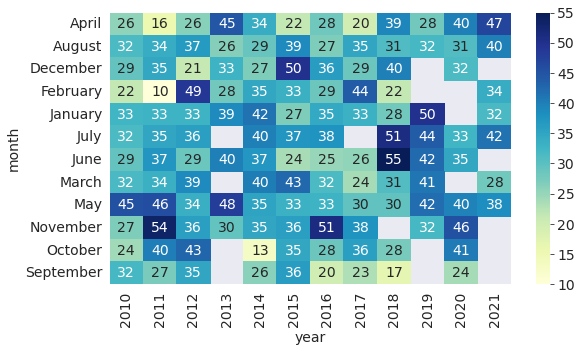

In [ ]:
police_assault = df[(df['Crm Cd Desc'] == 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER')]

sns.heatmap(police_assault.pivot_table(index='month', columns='year', values='Vict Age'), cmap="YlGnBu", annot=True)

**Observations**

* We filter crime description with reference to crime done on police

* We use heatmap to describe the crime happend in reference to year, vict age and months using pivot table

* It looks like the most number victims of crime are reported among the age range of 25 to 35

## **8. What is the most crimes where there are male victims?**

In [ ]:
#Answering question no 8

male_victim = df[(df['Vict Sex'] == 'M') & (df['Status Desc'] == 'Adult Arrest')].head(100)

fig13 = px.histogram(male_victim, x= male_victim['Crm Cd Desc'], color= 'Vict Age')

fig13.update_layout(title='Male victim range', title_x = 0.5,
                   xaxis_title='offence catogery',
                   yaxis_title='Name of the cases', template = 'plotly_white', xaxis_tickfont_size=7)

fig13.update_xaxes(tickangle=75)

**Observations**

* We see the relation ship between gender male and crome desc to find the most crime taken place with description

* We use Histogram to plot the relationship between the columns using plotly and update the layout using plotly

* The male Victims with assult with deadly weapon is most highest crime offense reported among the male victims through out the years

## Insight's Overview

* The most number of crime cases are registered, where the culprit(vict) age is 25 Years.

* 99.8% Percentage of Criminal casses are relavent to 77th street

* Battery assult is the most comman crime and most occuring crime

* The majority of the crime status is invest cont

* The victim's of rape are mostly from the area 77th street

* There is decresse in crime from 2020 to 2021 as there is 33% decress in victims

* Maximum adult arrest had been diluted in area called southwest

* The male Victims with assault with deadly weapon is most highest crime offense reported among the male victims through out the years



# **Summary**

* Exploring the data set which consists of data with 17,00000 plus rows and 20 columns with different graphs such as bar, histogram, pie, heatmap through which we did analyse the trends between the columns.

* Recovering impactfull insights by performing different analysis through the relationship between the coloumns

* By analysing we found that the lowest and highest crime victim or the cases lodged against are of the age 23 years.

* Concluding all the insights that we can process through graphs and different implimentations made above. 



# **References**

* https://github.com/JovianML/opendatasets
* https://www.kaggle.com/ananaymital/us-used-cars-dataset
* https://en.wikipedia.org/wiki/Exploratory_data_analysis
* https://likegeeks.com/python-correlation-matrix/
* https://www.cnet.com/roadshow/news/average-new-car-costs-price-increase/
* https://seaborn.pydata.org/index.html
* https://stackoverflow.com/questions/49984575/is-there-a-limit-to-plotting-markers-with-folium
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study
 

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project='la-crime-data')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/bittujha1997/la-crime-data


'https://jovian.ai/bittujha1997/la-crime-data'